In [1]:
#from google.colab import files
#files.upload()

Importing the libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

Importing Data

In [4]:
Apple=pd.read_csv('AAPL.csv')
Apple

Date        Open        High         Low       Close   Adj Close  \
0     2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
1     2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2     2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
3     2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
4     2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...          ...         ...         ...         ...         ...         ...   
2006  2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2007  2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2008  2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2009  2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2010  2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
0     75555200  
1     65005500  
2     67817400  
3     79573200  
4     98506100  
...        ...  
2006  24643000  
2007  12119700  
2008  23280300  
2009  36566500  
2010  36028600  

[2011 rows x 7 columns]

Observaton:-

Open:-It is the price at which the stock is first traded.

High:-It is the price of a stock which is highest price of the day.

Low:-It is the price of a stock which is lowest price of the day.

Close:-It is the price at which the price is last traded.

Adj Close:-It is the price of the stock which has been traded after market hours by the brokers so that the unfilled orders get filled.

Volume:-The total number of shares traded in that perticular day.

In [5]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


Converting the Dtype of Date column from object to datetime and indexing it

In [6]:
#Apple1=pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
#Apple1
Apple['Date'] = pd.to_datetime(Apple['Date'])

In [7]:
Apple

Date        Open        High         Low       Close   Adj Close  \
0    2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
1    2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2    2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
3    2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
4    2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...         ...         ...         ...         ...         ...         ...   
2006 2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2007 2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2008 2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2009 2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2010 2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
0     75555200  
1     65005500  
2     67817400  
3     79573200  
4     98506100  
...        ...  
2006  24643000  
2007  12119700  
2008  23280300  
2009  36566500  
2010  36028600  

[2011 rows x 7 columns]

In [8]:
!pip install mplfinance

In [9]:
import plotly.express as px
fig = px.line(Apple,Apple['Date'],Apple['Adj Close'], title='Apple chart Slider')#x='Date', y='Adj Close'

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [10]:
Apple=Apple.set_index('Date')

In [11]:
Apple.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

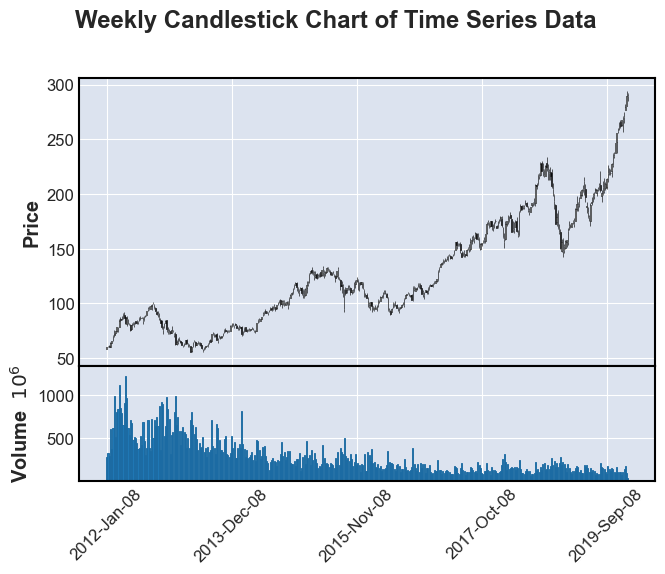

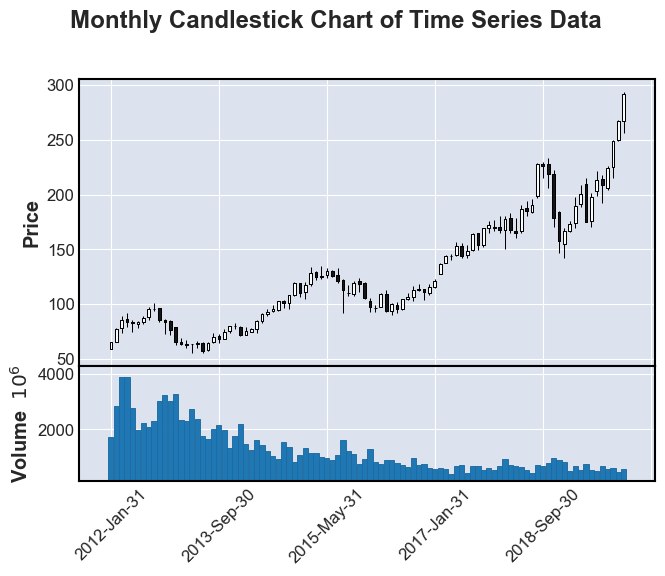

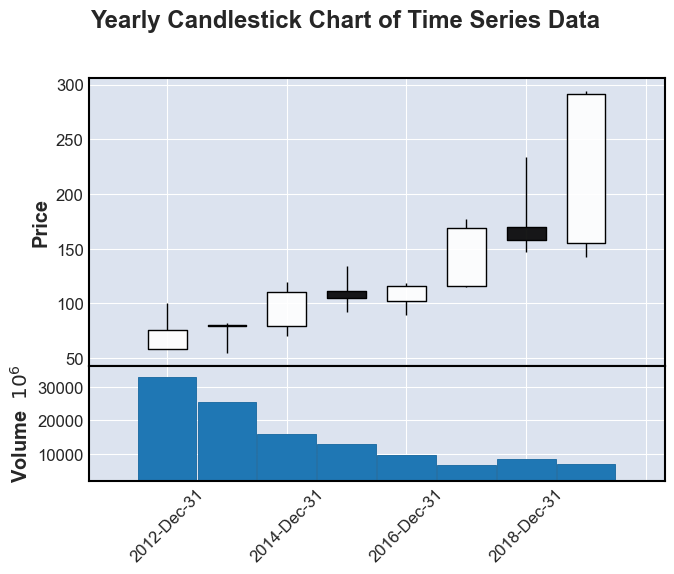

In [12]:
import mplfinance as mpf
import matplotlib as mpl

# Resample data on a weekly basis
weekly_data =Apple.resample('W').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Resample data on a monthly basis
monthly_data =Apple.resample('M').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Resample data on a yearly basis
yearly_data =Apple.resample('Y').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Create a candlestick chart of the weekly data
mpf.plot(weekly_data, type='candle', volume=True, title='Weekly Candlestick Chart of Time Series Data')

# Create a candlestick chart of the monthly data
mpf.plot(monthly_data, type='candle', volume=True, title='Monthly Candlestick Chart of Time Series Data')

# Create a candlestick chart of the yearly data
mpf.plot(yearly_data, type='candle', volume=True, title='Yearly Candlestick Chart of Time Series Data')


In [13]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [14]:
idx = pd.date_range('2012-01-03','2019-12-31')
idx

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               '2012-01-11', '2012-01-12',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=2920, freq='D')

In [15]:
filtered_date_index = idx[idx.weekday <5]
filtered_date_index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=2086, freq=None)

In [16]:
Apple1= Apple.reindex(filtered_date_index, fill_value=np.nan)
Apple1.head(50)

Open       High        Low      Close  Adj Close       Volume
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709   75555200.0
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536   65005500.0
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175   67817400.0
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630   79573200.0
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932   98506100.0
2012-01-10  60.844284  60.857143  60.214287  60.462856  52.248333   64549100.0
2012-01-11  60.382858  60.407143  59.901428  60.364285  52.163139   53771200.0
2012-01-12  60.325714  60.414288  59.821430  60.198570  52.019955   53146800.0
2012-01-13  59.957142  60.064285  59.808571  59.972858  51.824898   56505400.0
2012-01-16        NaN        NaN        NaN        NaN        NaN          NaN
2012-01-17  60.599998  60.855713  60.422855  60.671429  52.428562   60724300.0
2012-01-18  60.994286  61.352856  60.900002  61.301430  52.972977   69197800.0
2012-01-19  61.450001  61.624287  60.930000  61.107143  52.805092   65434600.0
2012-01-20  61.070000  61.071430  59.964287  60.042858  51.885387  103493600.0
2012-01-23  60.381428  61.207142  60.328571  61.058571  52.763115   76515600.0
2012-01-24  60.728573  60.728573  59.935715  60.058571  51.898972  136909500.0
2012-01-25  64.919998  64.921425  63.389999  63.808571  55.139496  239578500.0
2012-01-26  64.051430  64.112854  63.305714  63.518570  54.888889   80996300.0
2012-01-27  63.477142  64.068573  63.395714  63.897144  55.216022   74927300.0
2012-01-30  63.672855  64.842857  63.627144  64.715714  55.923389   94835300.0
2012-01-31  65.084282  65.462860  64.724289  65.211426  56.351761   97920900.0
2012-02-01  65.487144  65.570000  65.078575  65.169998  56.315968   67511500.0
2012-02-02  65.128571  65.309998  64.854286  65.017143  56.183865   46699100.0
2012-02-03  65.328575  65.714287  65.080002  65.668571  56.746796   71649900.0
2012-02-06  65.482857  66.425713  65.457146  66.281425  57.276386   62353200.0
2012-02-07  66.464287  67.107140  66.368568  66.975716  57.876339   79055900.0
2012-02-08  67.214287  68.112854  67.099998  68.097145  58.845402  101972500.0
2012-02-09  68.680000  70.964287  68.651428  70.452858  60.881111  221053700.0
2012-02-10  70.137146  71.088570  69.792854  70.488571  60.911942  157825500.0
2012-02-13  71.361427  71.975716  71.012856  71.800003  62.045200  129304000.0
2012-02-14  72.094284  72.794289  71.714287  72.779999  62.892056  115099600.0
2012-02-15  73.465714  75.184288  70.984283  71.095711  61.436600  376530000.0
2012-02-16  70.214287  72.127144  69.518570  71.744286  61.997032  236138000.0
2012-02-17  71.872856  72.538574  71.471428  71.731430  61.985954  133951300.0
2012-02-20        NaN        NaN        NaN        NaN        NaN          NaN
2012-02-21  72.411430  73.550003  72.017143  73.550003  63.557446  151398800.0
2012-02-22  73.297142  73.641426  72.724289  73.291428  63.334015  120825600.0
2012-02-23  73.582855  73.975716  72.785713  73.769997  63.747555  142006900.0
2012-02-24  74.238571  74.699997  74.091431  74.629997  64.490730  103768000.0
2012-02-27  74.472855  75.500000  73.754288  75.108574  64.904282  136895500.0
2012-02-28  75.422859  76.487144  75.121429  76.487144  66.095551  150096800.0
2012-02-29  77.365715  78.230003  76.528572  77.491432  66.963387  238002800.0
2012-03-01  78.309998  78.315712  76.967140  77.781425  67.213989  170817500.0
2012-03-02  77.748573  78.114288  77.502853  77.882858  67.301636  107928100.0
2012-03-05  77.917145  78.211426  75.142860  76.165718  65.817802  202281100.0
2012-03-06  74.808571  76.241432  73.745712  75.751427  65.459801  202559700.0
2012-03-07  76.685715  76.825714  74.757141  75.812859  65.512878  199630200.0
2012-03-08  76.384285  77.570000  76.017143  77.427139  66.907837  129114300.0
2012-03-09  77.744286  78.248573  77.587143  77.881432  67.300438  104729800.0
2012-03-12  78.425713  78.857140  78.142860  78.857140  68.143532  

In [17]:
Apple1.shape

(2086, 6)

In [18]:
Apple1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2086 entries, 2012-01-03 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   float64
dtypes: float64(6)
memory usage: 114.1 KB


In [19]:
df=Apple1.drop('Volume',axis=1)
df

Open        High         Low       Close   Adj Close
2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709
2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536
2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175
2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630
2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932
...                ...         ...         ...         ...         ...
2019-12-25         NaN         NaN         NaN         NaN         NaN
2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645
2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392
2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614
2019-12-31         NaN         NaN         NaN         NaN         NaN

[2086 rows x 5 columns]

In [20]:
window_size = 10

# Calculate the rolling mean and fill null values with the mean
rolling_mean = df['Adj Close'].rolling(window_size, min_periods=3).mean()
df['Adj_close_imp'] = df['Adj Close'].fillna(rolling_mean)
df_imp = pd.DataFrame(df)
df_imp.head(50)

Open       High        Low      Close  Adj Close  \
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932   
2012-01-10  60.844284  60.857143  60.214287  60.462856  52.248333   
2012-01-11  60.382858  60.407143  59.901428  60.364285  52.163139   
2012-01-12  60.325714  60.414288  59.821430  60.198570  52.019955   
2012-01-13  59.957142  60.064285  59.808571  59.972858  51.824898   
2012-01-16        NaN        NaN        NaN        NaN        NaN   
2012-01-17  60.599998  60.855713  60.422855  60.671429  52.428562   
2012-01-18  60.994286  61.352856  60.900002  61.301430  52.972977   
2012-01-19  61.450001  61.624287  60.930000  61.107143  52.805092   
2012-01-20  61.070000  61.071430  59.964287  60.042858  51.885387   
2012-01-23  60.381428  61.207142  60.328571  61.058571  52.763115   
2012-01-24  60.728573  60.728573  59.935715  60.058571  51.898972   
2012-01-25  64.919998  64.921425  63.389999  63.808571  55.139496   
2012-01-26  64.051430  64.112854  63.305714  63.518570  54.888889   
2012-01-27  63.477142  64.068573  63.395714  63.897144  55.216022   
2012-01-30  63.672855  64.842857  63.627144  64.715714  55.923389   
2012-01-31  65.084282  65.462860  64.724289  65.211426  56.351761   
2012-02-01  65.487144  65.570000  65.078575  65.169998  56.315968   
2012-02-02  65.128571  65.309998  64.854286  65.017143  56.183865   
2012-02-03  65.328575  65.714287  65.080002  65.668571  56.746796   
2012-02-06  65.482857  66.425713  65.457146  66.281425  57.276386   
2012-02-07  66.464287  67.107140  66.368568  66.975716  57.876339   
2012-02-08  67.214287  68.112854  67.099998  68.097145  58.845402   
2012-02-09  68.680000  70.964287  68.651428  70.452858  60.881111   
2012-02-10  70.137146  71.088570  69.792854  70.488571  60.911942   
2012-02-13  71.361427  71.975716  71.012856  71.800003  62.045200   
2012-02-14  72.094284  72.794289  71.714287  72.779999  62.892056   
2012-02-15  73.465714  75.184288  70.984283  71.095711  61.436600   
2012-02-16  70.214287  72.127144  69.518570  71.744286  61.997032   
2012-02-17  71.872856  72.538574  71.471428  71.731430  61.985954   
2012-02-20        NaN        NaN        NaN        NaN        NaN   
2012-02-21  72.411430  73.550003  72.017143  73.550003  63.557446   
2012-02-22  73.297142  73.641426  72.724289  73.291428  63.334015   
2012-02-23  73.582855  73.975716  72.785713  73.769997  63.747555   
2012-02-24  74.238571  74.699997  74.091431  74.629997  64.490730   
2012-02-27  74.472855  75.500000  73.754288  75.108574  64.904282   
2012-02-28  75.422859  76.487144  75.121429  76.487144  66.095551   
2012-02-29  77.365715  78.230003  76.528572  77.491432  66.963387   
2012-03-01  78.309998  78.315712  76.967140  77.781425  67.213989   
2012-03-02  77.748573  78.114288  77.502853  77.882858  67.301636   
2012-03-05  77.917145  78.211426  75.142860  76.165718  65.817802   
2012-03-06  74.808571  76.241432  73.745712  75.751427  65.459801   
2012-03-07  76.685715  76.825714  74.757141  75.812859  65.512878   
2012-03-08  76.384285  77.570000  76.017143  77.427139  66.907837   
2012-03-09  77.744286  78.248573  77.587143  77.881432  67.300438   
2012-03-12  78.425713  78.857140  78.142860  78.857140  68.143532   

            Adj_close_imp  
2012-01-03      50.765709  
2012-01-04      51.038536  
2012-01-05      51.605175  
2012-01-06      52.144630  
2012-01-09      52.061932  
2012-01-10      52.248333  
2012-01-11      52.163139  
2012-01-12      52.019955  
2012-01-13      51.824898  
2012-01-16      51.763590  
2012-01-17      52.428562  
2012-01-18      52.972977  
2012-01-19      52.805092  
2012-01-20      51.885387  
2012-01-23      52.763115  
2012-01-24      51.898972  
2012-01-25      55.13

In [21]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2086 entries, 2012-01-03 to 2019-12-31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2011 non-null   float64
 1   High           2011 non-null   float64
 2   Low            2011 non-null   float64
 3   Close          2011 non-null   float64
 4   Adj Close      2011 non-null   float64
 5   Adj_close_imp  2086 non-null   float64
dtypes: float64(6)
memory usage: 114.1 KB


In [22]:
df_imp.shape

(2086, 6)

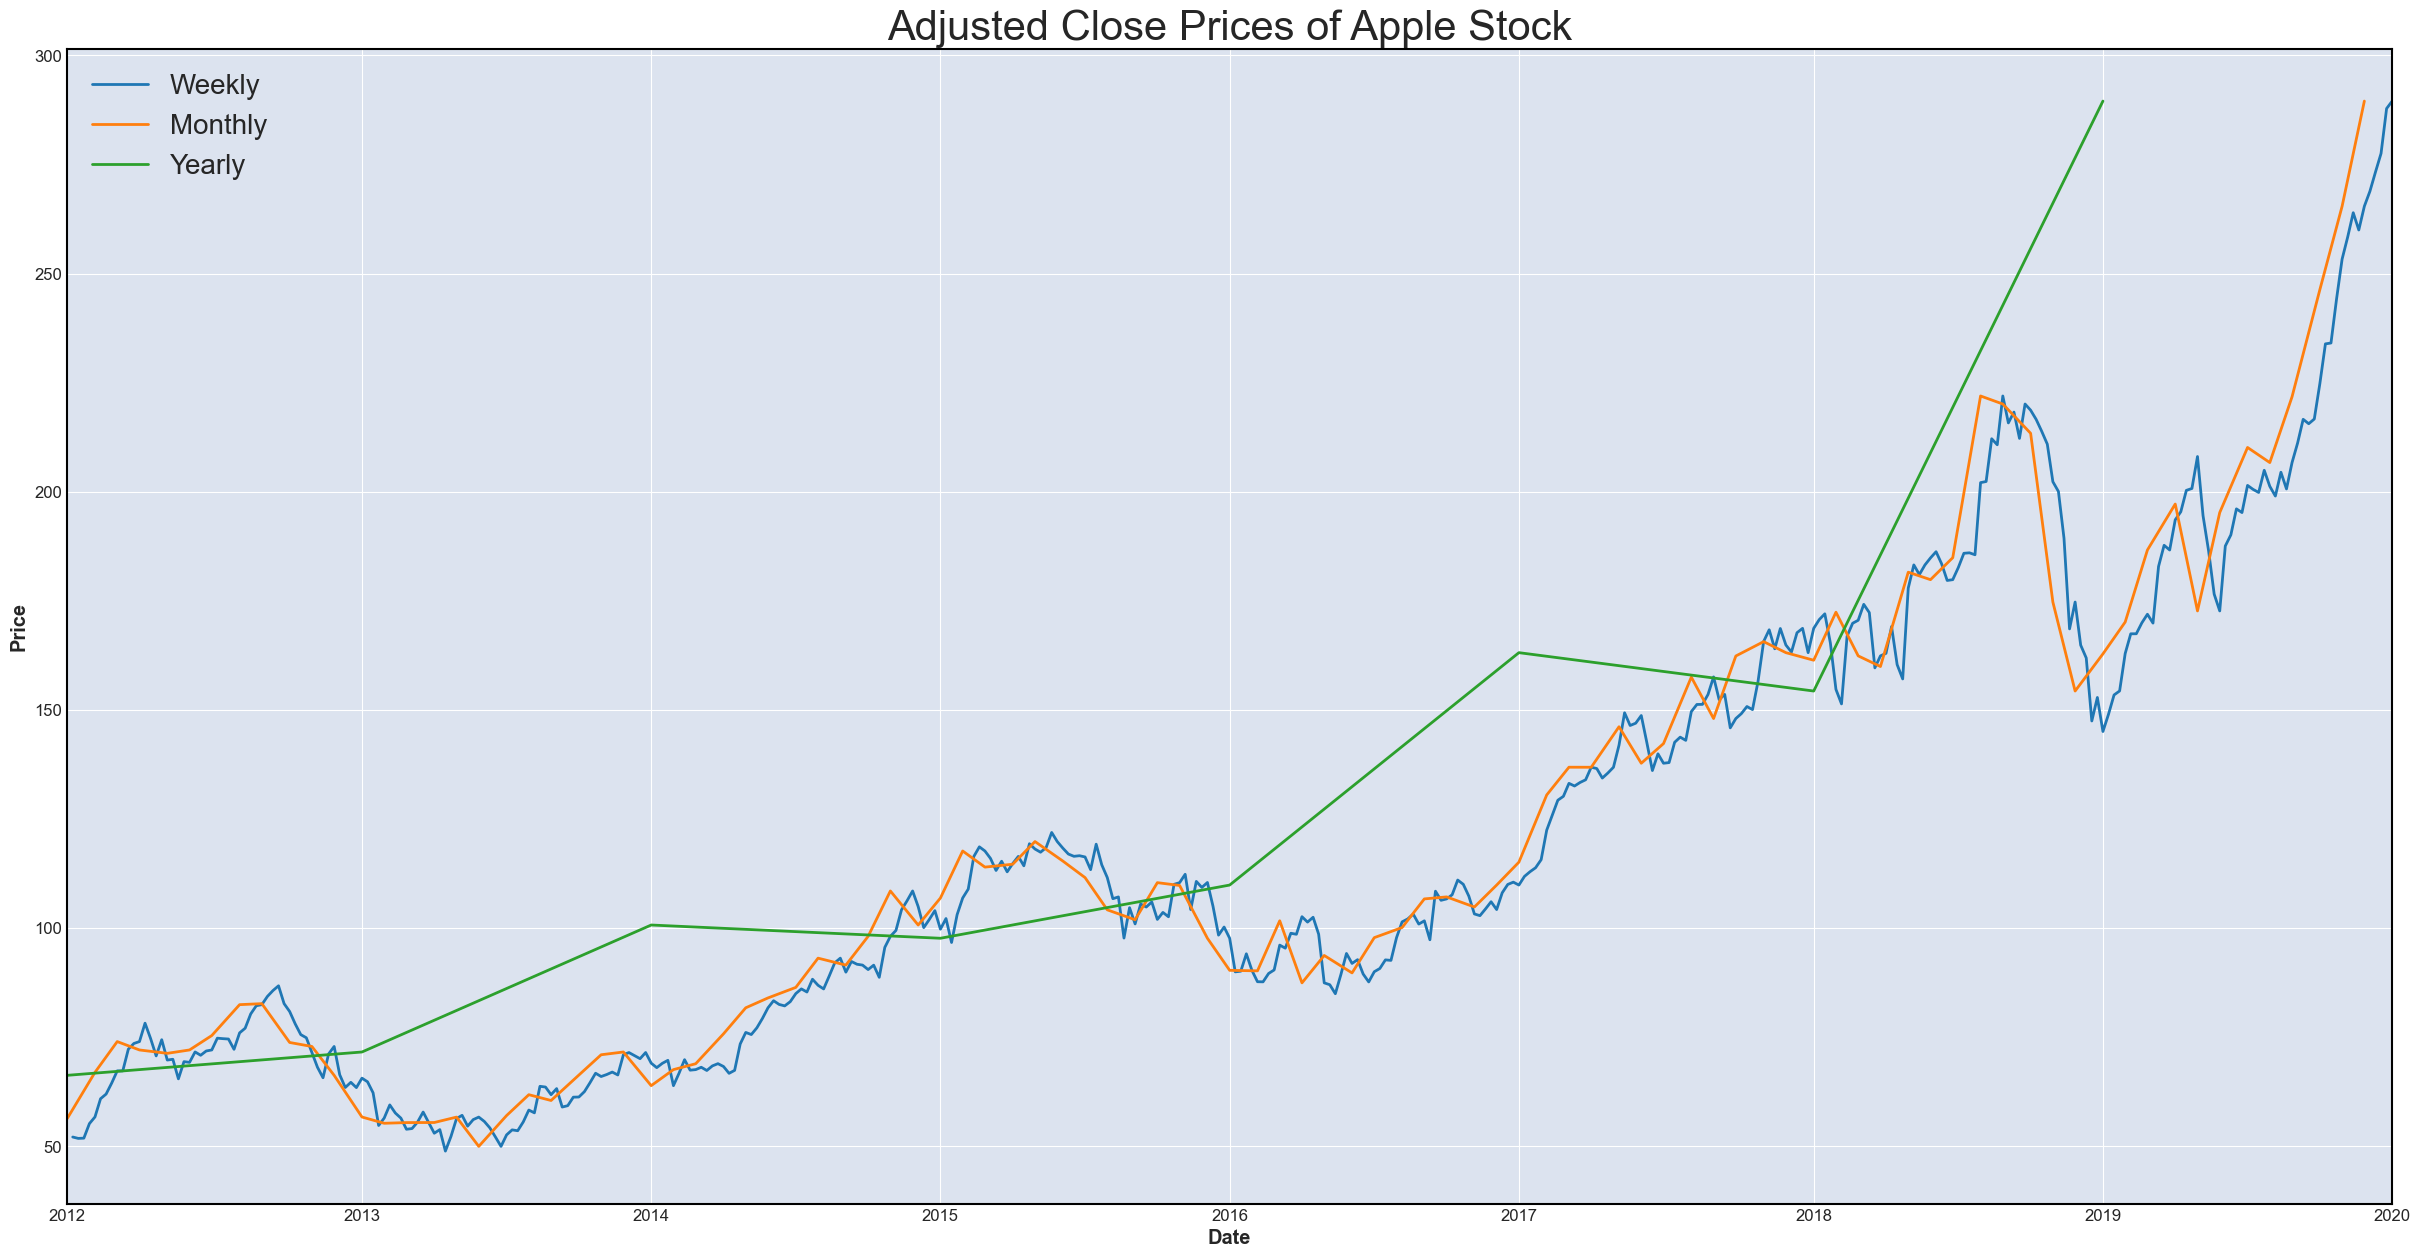

In [23]:
# Resample data on a weekly basis and select the last adjusted close price
weekly_close_prices =df_imp['Adj Close'].resample('W').last()

# Resample data on a monthly basis and select the last adjusted close price
monthly_close_prices =df_imp['Adj Close'].resample('M').last()

# Resample data on a yearly basis and select the last adjusted close price
yearly_close_prices =df_imp['Adj Close'].resample('Y').last()

# Create a figure with a size of 30x15 inches
plt.figure(figsize=(30,15))

# Plot the weekly, monthly, and yearly adjusted close prices
weekly_close_prices.plot(label='Weekly')
monthly_close_prices.plot(label='Monthly')
yearly_close_prices.plot(label='Yearly')

# Add a title and axis labels to the plot
plt.title('Adjusted Close Prices of Apple Stock',size=30)
plt.xlabel('Date')
plt.ylabel('Price')

# Add a legend to the plot
legend = plt.legend(fontsize=20)

# Show the plot
plt.show()

# Exploratory Data Analysis

In [24]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2086 entries, 2012-01-03 to 2019-12-31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2011 non-null   float64
 1   High           2011 non-null   float64
 2   Low            2011 non-null   float64
 3   Close          2011 non-null   float64
 4   Adj Close      2011 non-null   float64
 5   Adj_close_imp  2086 non-null   float64
dtypes: float64(6)
memory usage: 114.1 KB


We dont have any missing values in our data

Checkings for outliers in the data

<Axes: >

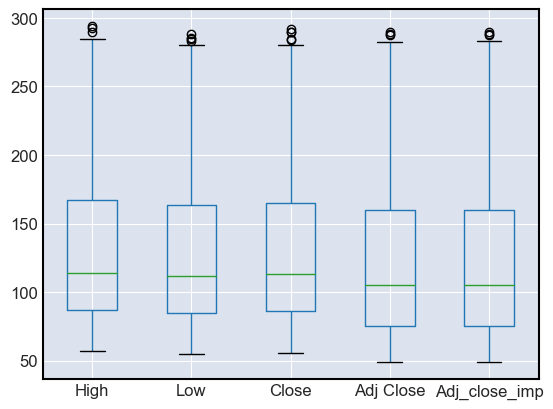

In [25]:
df_imp.iloc[:,1:7].boxplot()

As there are outliers and more variability in the data we transform the data into Log

In [26]:
#df2=df1.set_index('Date', inplace=True)
#df2

In [27]:
df=np.log(df_imp.iloc[:,1:7])
df
df=pd.DataFrame(df)
df

High       Low     Close  Adj Close  Adj_close_imp
2012-01-03  4.076326  4.067805  4.073243   3.927221       3.927221
2012-01-04  4.081597  4.068489  4.078602   3.932581       3.932581
2012-01-05  4.090886  4.076738  4.089643   3.943622       3.943622
2012-01-06  4.100871  4.092486  4.100043   3.954021       3.954021
2012-01-09  4.112629  4.097554  4.098455   3.952434       3.952434
...              ...       ...       ...        ...            ...
2019-12-25       NaN       NaN       NaN        NaN       5.625670
2019-12-26  5.669812  5.651436  5.669571   5.662695       5.662695
2019-12-27  5.683478  5.663377  5.669191   5.662316       5.662316
2019-12-30  5.679114  5.653261  5.675109   5.668233       5.668233
2019-12-31       NaN       NaN       NaN        NaN       5.645044

[2086 rows x 5 columns]

<Axes: >

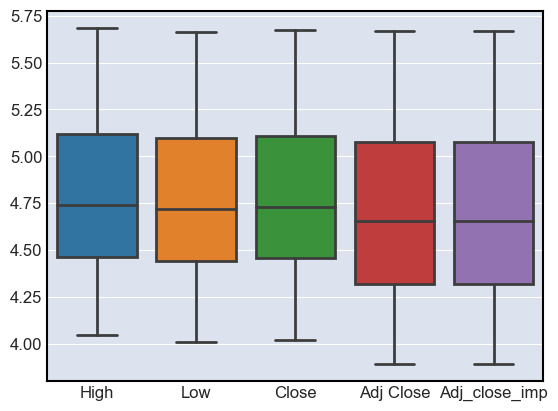

In [28]:
sns.boxplot(data=df)

Now by observing the plots we can see that the variability and outliers are removed

Now visualising the boxplot we can see that open,high,low,close,Adj close and Adj_close_imp contains the similar information so we consider Adj Close,and specifically we are choosing adj close because it is the last and latest traded price of that day

Observation:-we can see that the variability in prices of the stock are controlled

In [29]:
df0=pd.DataFrame(df['Adj_close_imp'])
df0

Adj_close_imp
2012-01-03       3.927221
2012-01-04       3.932581
2012-01-05       3.943622
2012-01-06       3.954021
2012-01-09       3.952434
...                   ...
2019-12-25       5.625670
2019-12-26       5.662695
2019-12-27       5.662316
2019-12-30       5.668233
2019-12-31       5.645044

[2086 rows x 1 columns]

In [30]:
df0.head(50)

Adj_close_imp
2012-01-03       3.927221
2012-01-04       3.932581
2012-01-05       3.943622
2012-01-06       3.954021
2012-01-09       3.952434
2012-01-10       3.956008
2012-01-11       3.954376
2012-01-12       3.951627
2012-01-13       3.947871
2012-01-16       3.946687
2012-01-17       3.959452
2012-01-18       3.969782
2012-01-19       3.966608
2012-01-20       3.949037
2012-01-23       3.965812
2012-01-24       3.949299
2012-01-25       4.009866
2012-01-26       4.005311
2012-01-27       4.011253
2012-01-30       4.023983
2012-01-31       4.031613
2012-02-01       4.030978
2012-02-02       4.028630
2012-02-03       4.038599
2012-02-06       4.047888
2012-02-07       4.058309
2012-02-08       4.074914
2012-02-09       4.108923
2012-02-10       4.109429
2012-02-13       4.127863
2012-02-14       4.141420
2012-02-15       4.118006
2012-02-16       4.127087
2012-02-17       4.126908
2012-02-20       4.110640
2012-02-21       4.151944
2012-02-22       4.148423
2012-02-23       4.154931
2012-02-24       4.166521
2012-02-27       4.172914
2012-02-28       4.191101
2012-02-29       4.204146
2012-03-01       4.207881
2012-03-02       4.209185
2012-03-05       4.186890
2012-03-06       4.181436
2012-03-07       4.182247
2012-03-08       4.203316
2012-03-09       4.209167
2012-03-12       4.221616

Plotting the chart of the stock after log transformation

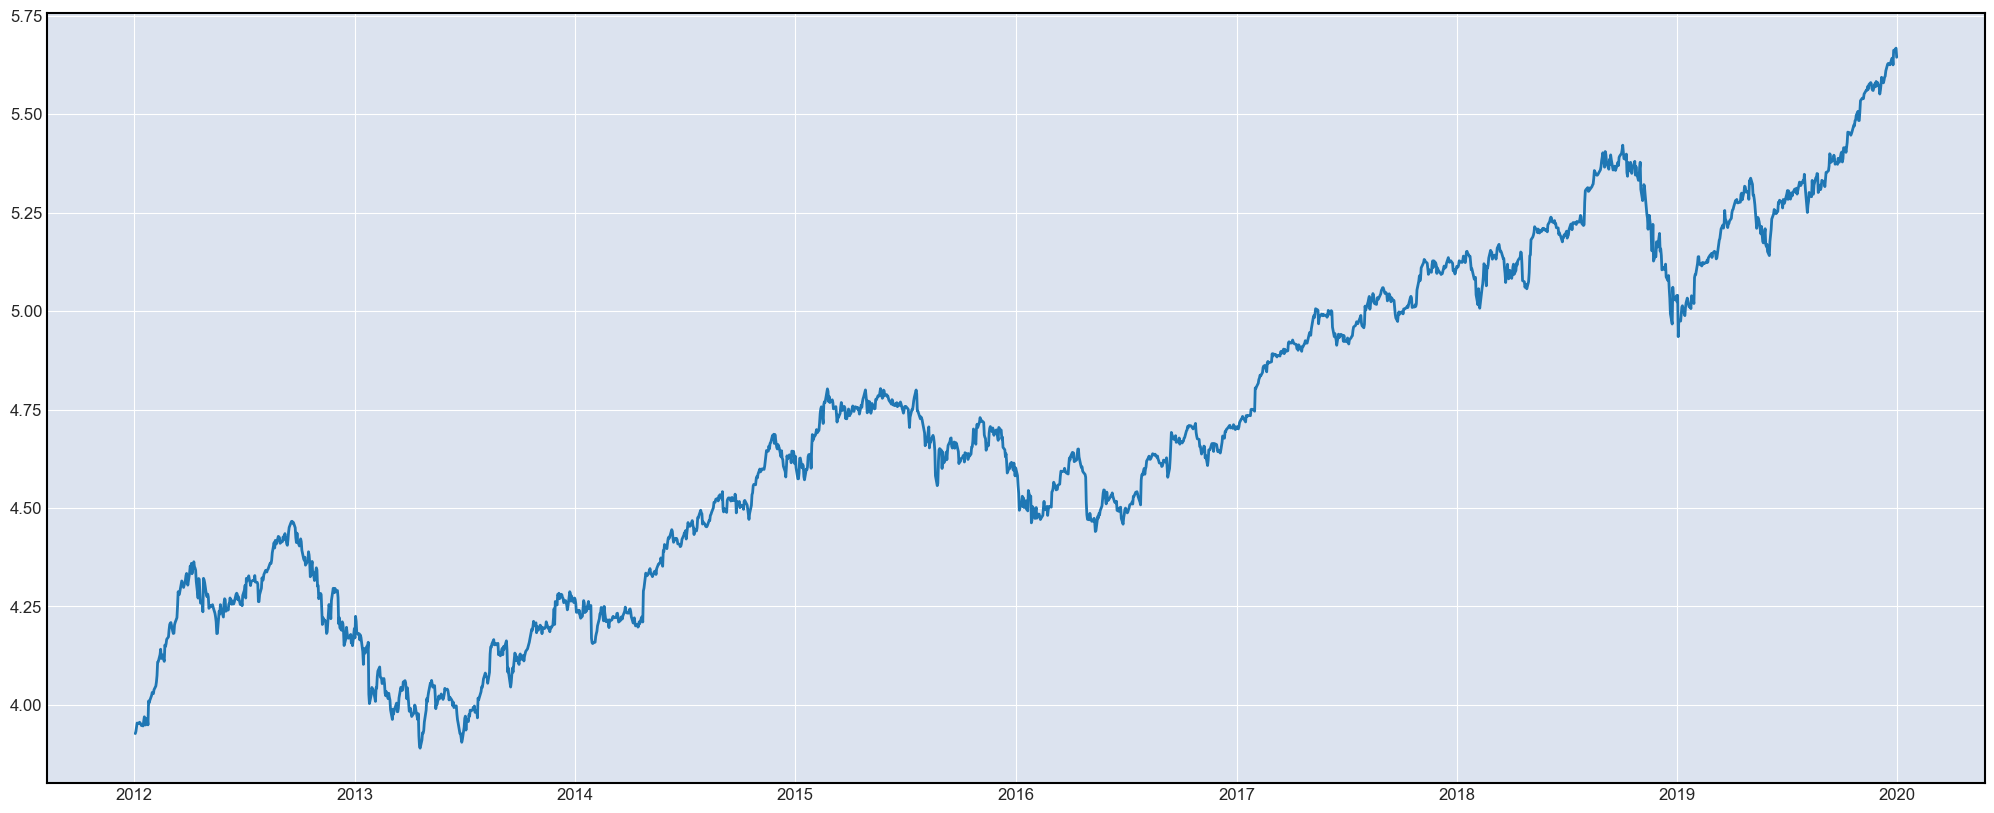

In [31]:
plt.figure(figsize=(25,10))
plt.plot(df0)

Train Test Split

In [32]:
train =df0[:-416]
test = df0[-416:]

# Check the size of train and test sets
print('Train size:', len(train))
print('Test size:', len(test))

Train size: 1670
Test size: 416


In [33]:
train

Adj_close_imp
2012-01-03       3.927221
2012-01-04       3.932581
2012-01-05       3.943622
2012-01-06       3.954021
2012-01-09       3.952434
...                   ...
2018-05-22       5.203191
2018-05-23       5.209583
2018-05-24       5.208467
2018-05-25       5.210750
2018-05-28       5.205184

[1670 rows x 1 columns]

In [34]:
test

Adj_close_imp
2018-05-29       5.207137
2018-05-30       5.205006
2018-05-31       5.201641
2018-06-01       5.219514
2018-06-04       5.227837
...                   ...
2019-12-25       5.625670
2019-12-26       5.662695
2019-12-27       5.662316
2019-12-30       5.668233
2019-12-31       5.645044

[416 rows x 1 columns]

Decomposing the data

Now we decompose the time series into its component:
1.Trend component
2.Seasonality
3.Residuals

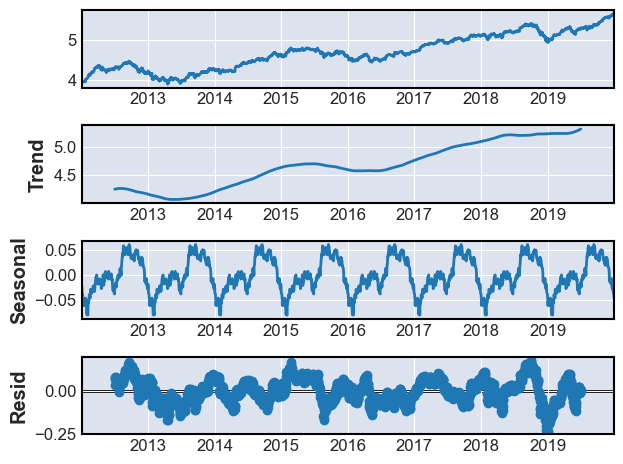

In [35]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df0, model='additive', period=260)
decomposition.plot();

In [36]:
a=(decomposition.resid[1000]+decomposition.seasonal[1000]+decomposition.trend[1000])
a

4.72976252783084

In [37]:
b=df0.iloc[1000]
b

Adj_close_imp    4.729763
Name: 2015-11-03 00:00:00, dtype: float64

a=b, this confirms that the decomposition been performed correctly.

We can observe that in the Trend component there is an Uptrend and
We can observe that in the seasonality component there is yearly seasonality

Now we check patterns in residuals so that we can extract some more hidden information like seasonality and

Text(0.5, 0, 'Date')

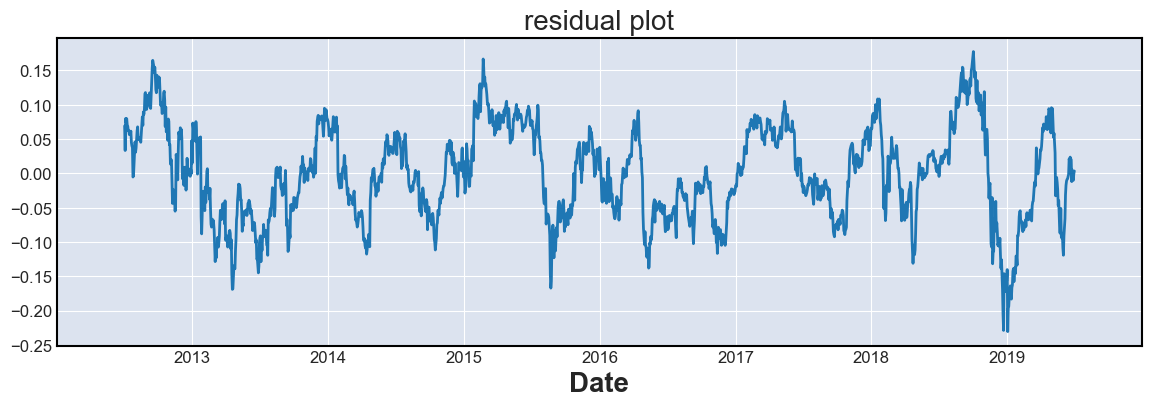

In [38]:
#residual plot
plt.figure(figsize=(14,4))
decomposition.resid.plot()
plt.title('residual plot',size=20)
plt.xlabel('Date',size=20)

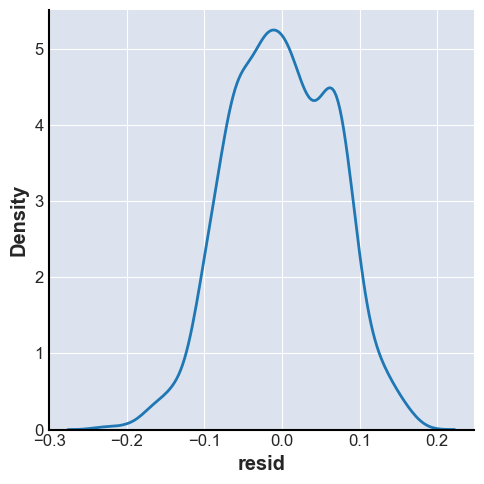

In [39]:
sns.displot(decomposition .resid,kind='kde')

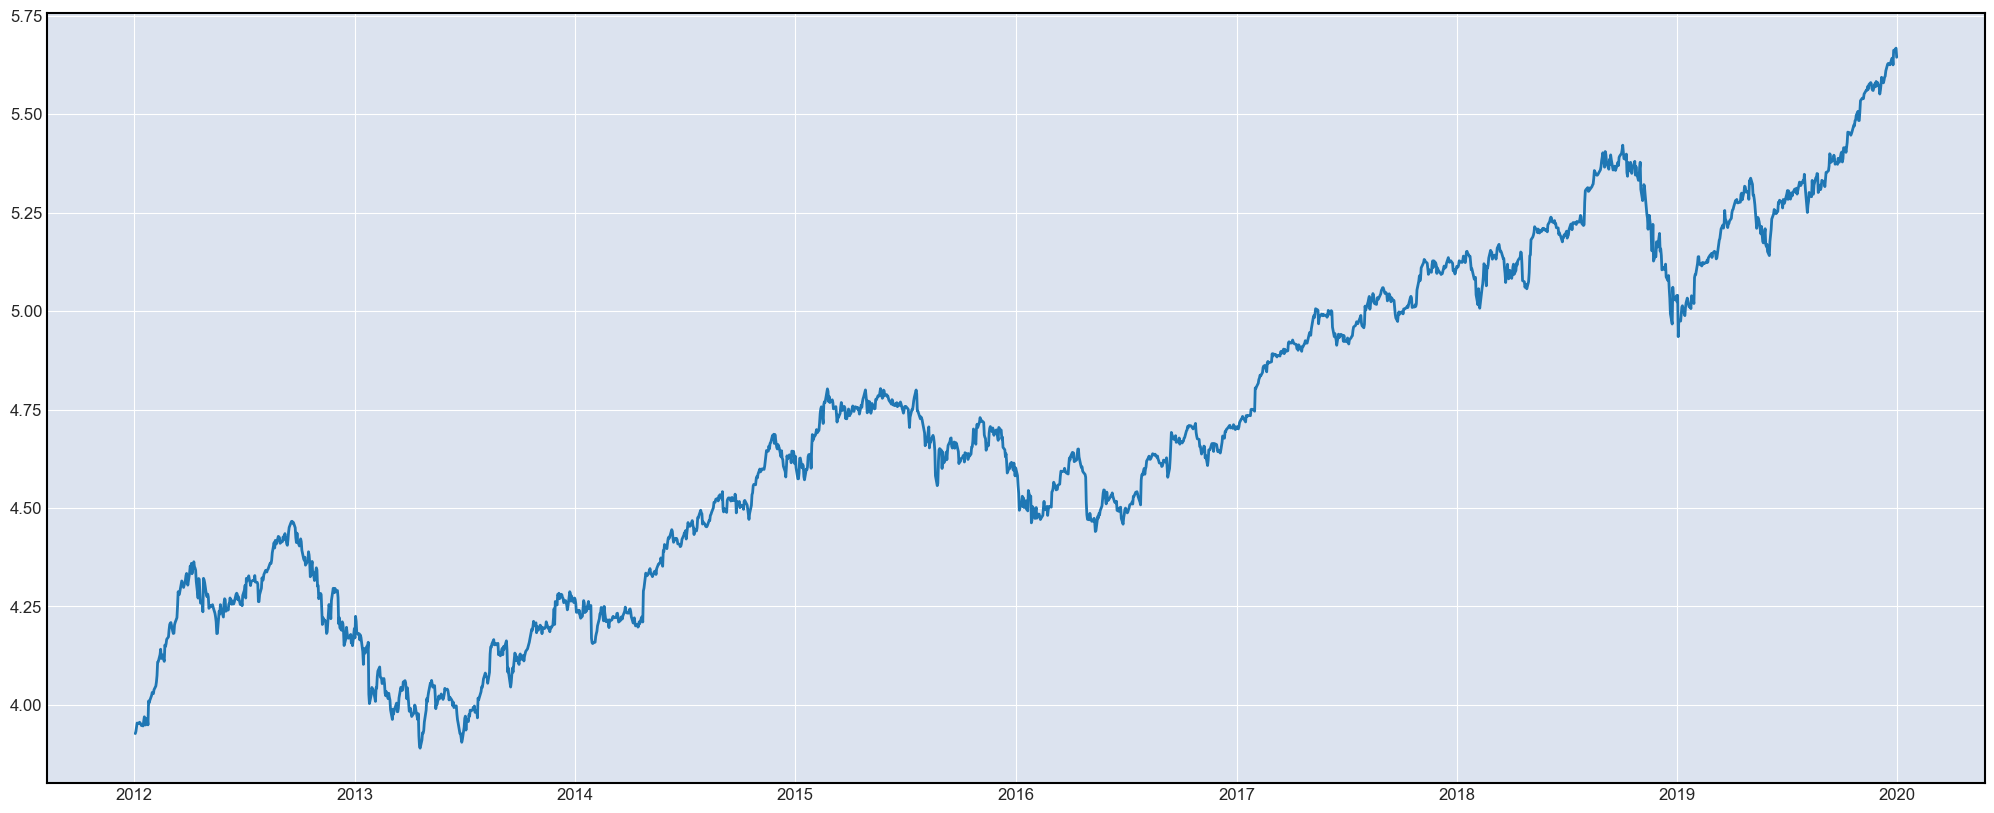

In [40]:
plt.figure(figsize=(25,10))
plt.plot(df0)

# Applying Holt winters model

Hyperparmeter tuning

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np

# define the parameter grid for grid search
param_grid = {'alpha': np.linspace(0.1, 0.2,1, endpoint=True),
              'beta': np.linspace(0.3, 0.4,1, endpoint=True),
              'gamma': np.linspace(0.5, 0.6,1, endpoint=True)}

# perform grid search using cross-validation
best_score = float('-inf')
for alpha in param_grid['alpha']:
    for beta in param_grid['beta']:
        for gamma in param_grid['gamma']:
            model = ExponentialSmoothing(train, trend='add', damped=False, seasonal='add', seasonal_periods=260,
                                         initialization_method='estimated', initial_level=None, initial_trend=None,
                                         initial_seasonal=None, use_boxcox=False, bounds=None, dates=None, freq=None,
                                         missing='none')
            fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
            score = fit.aic
            if score > best_score:
                best_score = score
                best_alpha = alpha
                best_beta = beta
                best_gamma = gamma

# print the optimal values of alpha, beta, and gamma
print("Optimal alpha:", best_alpha)
print("Optimal beta:", best_beta)
print("Optimal gamma:", best_gamma)


D:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



Optimal alpha: 0.1
Optimal beta: 0.3
Optimal gamma: 0.5


# Model Building

D:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



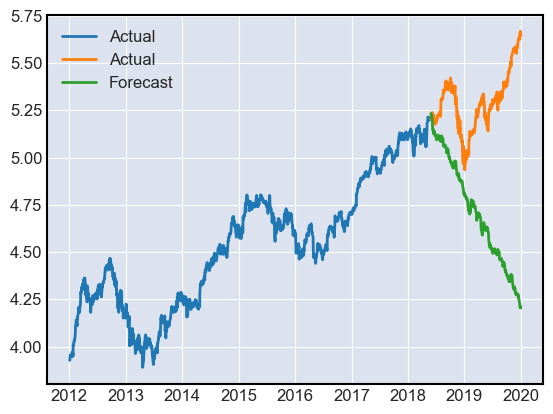

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for the Holt-Winters model
alpha = 0.1  # smoothing parameter for level
beta = 0.3   # smoothing parameter for trend
gamma = 0.5  # smoothing parameter for seasonality
season_length =260  # length of seasonal cycle

# Fit the Holt-Winters model to the data
model1 = ExponentialSmoothing(train, seasonal_periods=season_length, trend='add', seasonal='add')
fitted_model1 = model1.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Make predictions using the Holt-Winters model
forecast4 = fitted_model1.forecast(steps=416) 

# Plot the original data and the forecasted values
plt.plot(train.index, train.values, label='Actual')
plt.plot(test.index, test.values, label='Actual')
plt.plot(forecast4.index, forecast4.values, label='Forecast')
plt.legend()
plt.show()

In [43]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:            Adj_close_imp   No. Observations:                 1670
Model:             ExponentialSmoothing   SSE                              1.970
Optimized:                         True   AIC                         -10731.917
Trend:                         Additive   BIC                          -9300.884
Seasonal:                      Additive   AICC                        -10630.674
Seasonal Periods:                   260   Date:                 Sun, 09 Apr 2023
Box-Cox:                          False   Time:                         15:33:23
Box-Cox Coeff.:                    None                                         
==================================================================================
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.1000000                alpha                False
smoothing_trend                0.3000000                 beta                False
smoothing_seasonal             0.5000000                gamma                False
initial_level                  3.9206720                  l.0                 True
initial_trend                  0.0031327                  b.0                 True
initial_seasons.0             -0.0159500                  s.0                 True
initial_seasons.1             -0.0005155                  s.1                 True
initial_seasons.2              0.0024517                  s.2                 True
initial_seasons.3             -0.0016900                  s.3                 True
initial_seasons.4             -0.0040584                  s.4                 True
initial_seasons.5             -0.0026137                  s.5                 True
initial_seasons.6             -0.0070104                  s.6                 True
initial_seasons.7             -0.0079704                  s.7                 True
initial_seasons.8             -0.0155162                  s.8                 True
initial_seasons.9             -0.0304193                  s.9                 True
initial_seasons.10            -0.0342371                 s.10                 True
initial_seasons.11            -0.0235279                 s.11                 True
initial_seasons.12            -0.0354952                 s.12                 True
initial_seasons.13            -0.0578256                 s.13                 True
initial_seasons.14            -0.0502340                 s.14                 True
initial_seasons.15            -0.0685532                 s.15                 True
initial_seasons.16            -0.0378720                 s.16                 True
initial_seasons.17            -0.0760377                 s.17                 True
initial_seasons.18            -0.0837164                 s.18                 True
initial_seasons.19            -0.0737963                 s.19                 True
initial_seasons.20            -0.0771155                 s.20                 True
initial_seasons.21            -0.0769034                 s.21                 True
initial_seasons.22            -0.0757544                 s.22                 True
initial_seasons.23            -0.0692195                 s.23                 True
initial_seasons.24            -0.0673360                 s.24                 True
initial_seasons.25            -0.0487832                 s.25                 True
initial_seasons.26            -0.0342544                 s.26                 True
initial_seasons.27            -0.0040807                 s.27                 True
initial_seasons.28             0.0033989                 s.28                 True
initial_seasons.29             0.0209452                 s.29          

Checking the values for MAPE,MAE,RMSE

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# calculate MAPE
mape = np.mean(np.abs((np.array(np.exp(test.values)) - np.array(np.exp(forecast4.values))) / np.array(np.exp(test.values))) * 100)

# calculate MAE
mae = mean_absolute_error(np.exp(test.values), np.exp(forecast4.values))

# calculate RMSE
rmse = np.sqrt(mean_squared_error(np.exp(test.values), np.exp(forecast4.values)))

# print the results
print("MAPE:", mape)
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 41.32534890748561
MAE: 85.0486688274325
RMSE: 100.5018831932826


The models accuracy is 77.1%

# Building model with trial and test method 

D:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



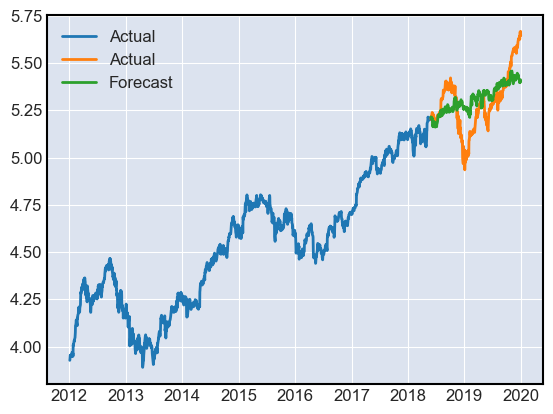

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for the Holt-Winters model
alpha = 0.2  # smoothing parameter for level
beta = 0.15   # smoothing parameter for trend
gamma = 0.65 # smoothing parameter for seasonality
season_length =260  # length of seasonal cycle

# Fit the Holt-Winters model to the data
model2 = ExponentialSmoothing(train, seasonal_periods=season_length, trend='add', seasonal='add')
fitted_model2 = model2.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Make predictions using the Holt-Winters model
forecast2 = fitted_model2.forecast(steps=416) 

# Plot the original data and the forecasted values
plt.plot(train.index, train.values, label='Actual')
plt.plot(test.index, test.values, label='Actual')
plt.plot(forecast2.index, forecast2.values, label='Forecast')
plt.legend()
plt.show()

In [46]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:            Adj_close_imp   No. Observations:                 1670
Model:             ExponentialSmoothing   SSE                              1.245
Optimized:                         True   AIC                         -11499.031
Trend:                         Additive   BIC                         -10067.998
Seasonal:                      Additive   AICC                        -11397.787
Seasonal Periods:                   260   Date:                 Sun, 09 Apr 2023
Box-Cox:                          False   Time:                         15:33:26
Box-Cox Coeff.:                    None                                         
==================================================================================
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.2000000                alpha                False
smoothing_trend                0.1500000                 beta                False
smoothing_seasonal             0.6500000                gamma                False
initial_level                  3.9389749                  l.0                 True
initial_trend                  0.0042566                  b.0                 True
initial_seasons.0             -0.0183567                  s.0                 True
initial_seasons.1             -0.0087921                  s.1                 True
initial_seasons.2             -0.0086256                  s.2                 True
initial_seasons.3             -0.0095319                  s.3                 True
initial_seasons.4             -0.0104798                  s.4                 True
initial_seasons.5             -0.0057896                  s.5                 True
initial_seasons.6             -0.0076353                  s.6                 True
initial_seasons.7             -0.0069883                  s.7                 True
initial_seasons.8             -0.0128517                  s.8                 True
initial_seasons.9             -0.0229063                  s.9                 True
initial_seasons.10            -0.0191841                 s.10                 True
initial_seasons.11            -0.0039236                 s.11                 True
initial_seasons.12            -0.0121979                 s.12                 True
initial_seasons.13            -0.0346731                 s.13                 True
initial_seasons.14            -0.0292624                 s.14                 True
initial_seasons.15            -0.0591794                 s.15                 True
initial_seasons.16            -0.0299285                 s.16                 True
initial_seasons.17            -0.0732645                 s.17                 True
initial_seasons.18            -0.0848566                 s.18                 True
initial_seasons.19            -0.0791835                 s.19                 True
initial_seasons.20            -0.0801823                 s.20                 True
initial_seasons.21            -0.0839340                 s.21                 True
initial_seasons.22            -0.0887937                 s.22                 True
initial_seasons.23            -0.0844398                 s.23                 True
initial_seasons.24            -0.0813213                 s.24                 True
initial_seasons.25            -0.0633968                 s.25                 True
initial_seasons.26            -0.0473081                 s.26                 True
initial_seasons.27            -0.0102578                 s.27                 True
initial_seasons.28            -0.0003156                 s.28                 True
initial_seasons.29             0.0207487                 s.29          

Checking the values for MAPE,MAE,RMSE

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# calculate MAPE
mape = np.mean(np.abs((np.array(np.exp(test.values)) - np.array(np.exp(forecast2.values))) / np.array(np.exp(test.values))) * 100)

# calculate MAE
mae = mean_absolute_error(np.exp(test.values), np.exp(forecast2.values))

# calculate RMSE
rmse = np.sqrt(mean_squared_error(np.exp(test.values), np.exp(forecast2.values)))

# print the results
print("MAPE:", mape)
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 13.582213766487394
MAE: 19.813825615876723
RMSE: 24.520926543366613


The models accuracy is 86.42%

D:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



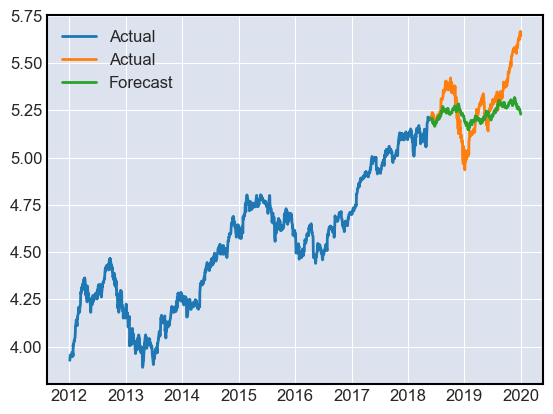

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for the Holt-Winters model
alpha = 0.4  # smoothing parameter for level
beta = 0.45   # smoothing parameter for trend
gamma = 0.15 # smoothing parameter for seasonality
season_length =260  # length of seasonal cycle

# Fit the Holt-Winters model to the data
model3 = ExponentialSmoothing(train, seasonal_periods=season_length, trend='add', seasonal='add')
fitted_model3 = model3.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Make predictions using the Holt-Winters model
forecast2 = fitted_model3.forecast(steps=416) 

# Plot the original data and the forecasted values
plt.plot(train.index, train.values, label='Actual')
plt.plot(test.index, test.values, label='Actual')
plt.plot(forecast2.index, forecast2.values, label='Forecast')
plt.legend()
plt.show()

In [49]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:            Adj_close_imp   No. Observations:                 1670
Model:             ExponentialSmoothing   SSE                              0.647
Optimized:                         True   AIC                         -12592.571
Trend:                         Additive   BIC                         -11161.538
Seasonal:                      Additive   AICC                        -12491.328
Seasonal Periods:                   260   Date:                 Sun, 09 Apr 2023
Box-Cox:                          False   Time:                         15:33:28
Box-Cox Coeff.:                    None                                         
==================================================================================
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.4000000                alpha                False
smoothing_trend                0.4500000                 beta                False
smoothing_seasonal             0.1500000                gamma                False
initial_level                  3.9159286                  l.0                 True
initial_trend                  0.0113764                  b.0                 True
initial_seasons.0             -0.0012404                  s.0                 True
initial_seasons.1              0.0025351                  s.1                 True
initial_seasons.2              0.0003383                  s.2                 True
initial_seasons.3             -0.0113251                  s.3                 True
initial_seasons.4             -0.0184206                  s.4                 True
initial_seasons.5             -0.0245091                  s.5                 True
initial_seasons.6             -0.0287345                  s.6                 True
initial_seasons.7             -0.0288578                  s.7                 True
initial_seasons.8             -0.0303809                  s.8                 True
initial_seasons.9             -0.0412655                  s.9                 True
initial_seasons.10            -0.0436810                 s.10                 True
initial_seasons.11            -0.0369572                 s.11                 True
initial_seasons.12            -0.0418373                 s.12                 True
initial_seasons.13            -0.0557177                 s.13                 True
initial_seasons.14            -0.0458901                 s.14                 True
initial_seasons.15            -0.0493833                 s.15                 True
initial_seasons.16            -0.0279156                 s.16                 True
initial_seasons.17            -0.0485267                 s.17                 True
initial_seasons.18            -0.0530889                 s.18                 True
initial_seasons.19            -0.0526532                 s.19                 True
initial_seasons.20            -0.0671591                 s.20                 True
initial_seasons.21            -0.0720331                 s.21                 True
initial_seasons.22            -0.0718470                 s.22                 True
initial_seasons.23            -0.0711956                 s.23                 True
initial_seasons.24            -0.0801271                 s.24                 True
initial_seasons.25            -0.0767968                 s.25                 True
initial_seasons.26            -0.0680159                 s.26                 True
initial_seasons.27            -0.0581846                 s.27                 True
initial_seasons.28            -0.0628001                 s.28                 True
initial_seasons.29            -0.0510032                 s.29          

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# calculate MAPE
mape = np.mean(np.abs((np.array(np.exp(test.values)) - np.array(np.exp(forecast2.values))) / np.array(np.exp(test.values))) * 100)

# calculate MAE
mae = mean_absolute_error(np.exp(test.values), np.exp(forecast2.values))

# calculate RMSE
rmse = np.sqrt(mean_squared_error(np.exp(test.values), np.exp(forecast2.values)))

# print the results
print("MAPE:", mape)
print("MAE:", mae)
print("RMSE:", rmse)

MAPE: 12.070702969524481
MAE: 21.58389502674435
RMSE: 29.576129089410298


# Predicting the prices for next 30 days and plotting them

D:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



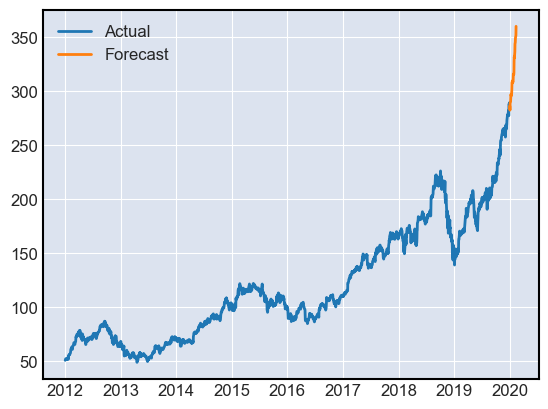

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the parameters for the Holt-Winters model
alpha = 0.4 # smoothing parameter for level
beta = 0.45   # smoothing parameter for trend
gamma = 0.15  # smoothing parameter for seasonality
season_length =260  # length of seasonal cycle

# Fit the Holt-Winters model to the data
model = ExponentialSmoothing(df0, seasonal_periods=season_length, trend='add', seasonal='add')
fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Make predictions using the Holt-Winters model
forecast = fitted_model.forecast(steps=30) 

# Plot the original data and the forecasted values
plt.plot(df0.index, np.exp(df0.values), label='Actual')
plt.plot(forecast.index, np.exp(forecast.values), label='Forecast')
plt.legend()
plt.show()

In [52]:
last=df0['2019':]
last1=np.exp(last)
last1

Adj_close_imp
2019-01-01     151.973642
2019-01-02     154.516388
2019-01-03     139.125412
2019-01-04     145.064575
2019-01-07     144.741714
...                   ...
2019-12-25     277.458069
2019-12-26     287.923645
2019-12-27     287.814392
2019-12-30     289.522614
2019-12-31     282.885899

[261 rows x 1 columns]

Enlarged view of the plot

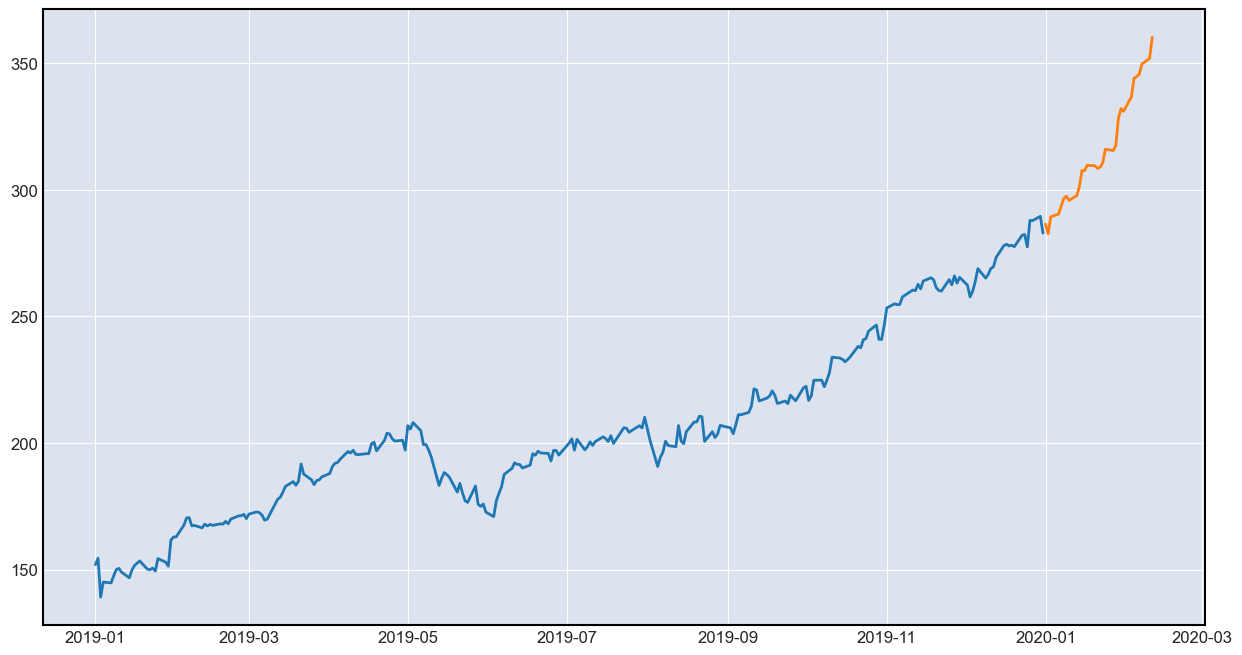

In [53]:
plt.figure(figsize=(15,8))
plt.plot(last1.index,last1.values, label='Actual')
plt.plot(forecast.index, np.exp(forecast.values), label='Forecast')

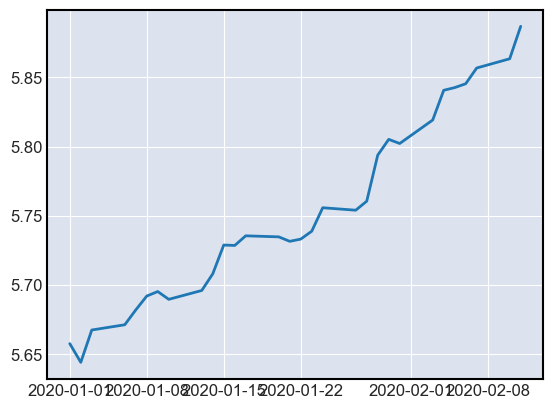

In [54]:
plt.plot(forecast.index,forecast.values)

In [55]:
forecast.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-10', '2020-02-11'],
              dtype='datetime64[ns]', freq='B')

In [56]:
filtered_date_index[0]

Timestamp('2012-01-03 00:00:00')

In [57]:
pip freeze

absl-py==1.4.0
aiohttp==3.8.4
aiosignal==1.3.1
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==4.2.2
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
asttokens==2.2.1
astunparse==1.6.3
async-timeout==4.0.2
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:/